# PyTorch Computer Vision

## 0. Computer vision libaries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms`- functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Create a Python iterable over a dataset.

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.4.0.dev20240610
0.19.0.dev20240610


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets

In [2]:
# Setup training data
train_data=datasets.FashionMNIST(
    root="data", # whare to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input and output shapes of data

In [8]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels,height,width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels,height,width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

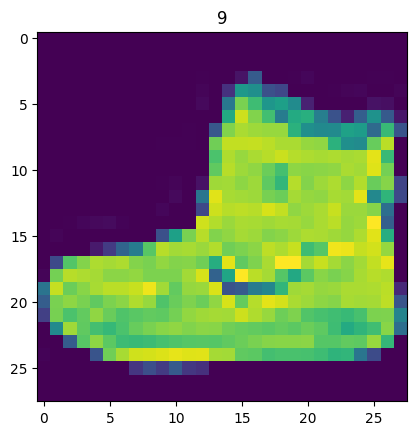

In [9]:
image,label=train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
#image

(-0.5, 27.5, 27.5, -0.5)

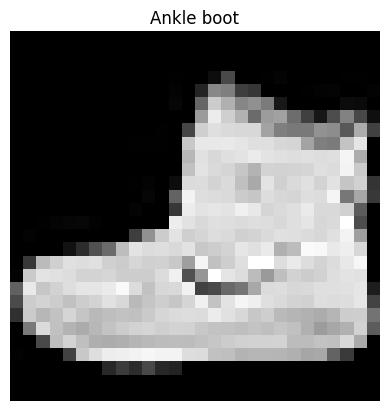

In [10]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

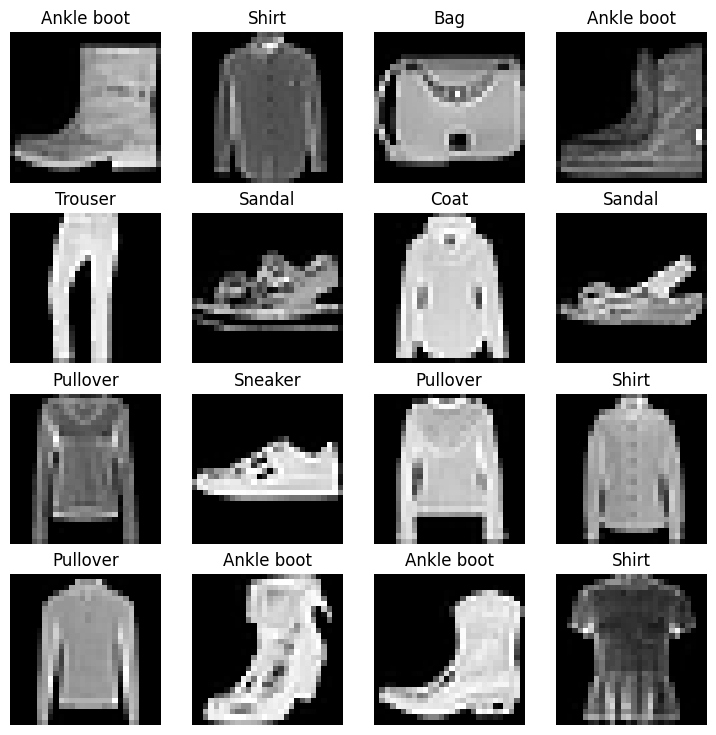

In [11]:
# Plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? or do you think we'll need non_linearities?


In [12]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini_batches).

why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE=32

# Turn datasets into iterables (batches)
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1ef66a748f0>,
 <torch.utils.data.dataloader.DataLoader at 0x1ef67bbc380>)

In [14]:
# Let's check out what we've created
print(f"DataLoader: {train_dataloader,test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x000001EF66A748F0>, <torch.utils.data.dataloader.DataLoader object at 0x000001EF67BBC380>)
Length of train_dataloader: 1875 batches of 32...
Length of test dataloader: 313 batches of 32...


In [15]:
# Check out what's inside the training dataloader
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


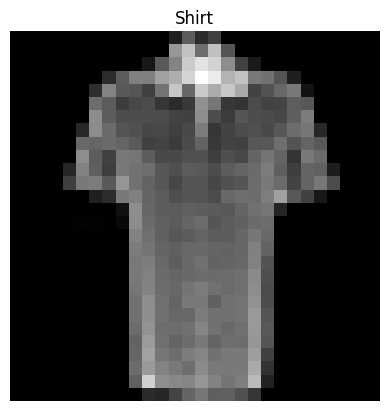

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

when starting to build a series of machine learning modeling experiments, it's best practice to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [17]:
# Create a flatten layer
flatten_model=nn.Flatten()

# Get a single sample
x=train_features_batch[0]

# Flatten the sample
output=flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [18]:
from torch import nn
class FashionMnistModelV0(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
    )

    def forward(self,x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMnistModelV0(
    input_shape=784, # this is 28*28
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMnistModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [22]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [23]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss fn and optimizer
loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main thing you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs.

In [24]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
    """Print diff b/w start and end time."""
    total_time=end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [25]:
start_time=timer()
# some code...
end_time=timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


3.190001007169485e-05

In [26]:
# UPTOHERE: 3.3 Creating a training loop and training a model on batches of data...
# Highlight that the optimizer will update a model's parameters once per batch rather than once per epoch...

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [27]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()

# Set the no of epochs (we'll keep this small for faster training time)
epochs=3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    ### Training
    train_loss=0
    # Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward pass
        y_pred=model_0(X)

        # 2. Calculate the loss (per batch)
        loss=loss_fn(y_pred,y)
        train_loss+=loss # accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # print out what's happening
        if batch % 400 == 0:
            print(f"Looked at: {batch*len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss/=len(train_dataloader)

    ### Testing
    test_loss,test_acc=0,0

    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            # 1. Forward pass
            test_pred=model_0(X_test)

            # 2. Calculate loss (accumulatively)
            test_loss+=loss_fn(test_pred,y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

            # Calculate the test loss average per batch
            test_loss/=len(test_dataloader)

            # Calculate the test acc average per batch
            test_acc/=len(test_dataloader)

        # Print out what's happening
        print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=str(next(model_0.parameters()).device))

C:\Users\Shibu.AI-SERVER\.conda\envs\shibu_env1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.


 33%|████████████████████████████                                                        | 1/3 [00:10<00:21, 10.66s/it]


Train loss: 0.5904 | Test loss: 0.0010 | Test acc: 0.2803
Epoch: 1
-----
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:21<00:10, 10.91s/it]


Train loss: 0.4763 | Test loss: 0.0009 | Test acc: 0.3003
Epoch: 2
-----
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:32<00:00, 10.83s/it]


Train loss: 0.4550 | Test loss: 0.0011 | Test acc: 0.3003
Train time on cpu: 32.485 seconds


In [28]:
next(model_0.parameters()).device

device(type='cpu')

## 4. Make predictions and Model 0 results

In [29]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
    """ Returns a dictionary containing the results of model predicting on data_loader."""
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # Make predictions
            y_pred=model(X)

            # Accumulate the loss and acc values per batch
            loss+=loss_fn(y_pred,y)
            acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find the average loss/acc per batch
        loss/=len(data_loader)
        acc/=len(data_loader)

    return {"model_name":model.__class__.__name__, # only works when model was created with class name
            "model_loss":loss.item(),
            "model_acc":acc}

# Calculate model 0 results on test dataset
model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)

model_0_results

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 249.77it/s]


{'model_name': 'FashionMnistModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [30]:
!nvidia-smi

Tue Jun 11 17:47:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 538.46                 Driver Version: 538.46       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A40                   TCC   | 00000000:51:00.0 Off |                    0 |
|  0%   46C    P0              80W / 300W |   7245MiB / 46068MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [31]:
torch.cuda.is_available()

True

In [135]:
# Setup device_agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02

In [33]:
# Create a model with non-linear and linear layers
class FashionMnistModelV1(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(), # flatten inputs into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward(self,x:torch.Tensor):
        return self.layer_stack(x)

In [115]:
# create an instance of model_1
torch.manual_seed(42)
model_1=FashionMnistModelV1(input_shape=784, # this is the output of the flatten after our 28*28 image goes in
                            hidden_units=10,
                            output_shape=len(class_names)).to(device) # send to the GPU if it's available

model_1

FashionMnistModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [35]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [36]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss() # measure how wrong our model is

optimizer=torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                          lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [37]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
    """ Perform a training with model trying to learn on data loader"""
    train_loss,train_acc=0,0

    # Put model into training model
    model.train()

    # Add a loop to loop through the training batches
    for batch,(X,y) in enumerate(data_loader):
        # Put data on target device
        X,y=X.to(device),y.to(device)

        # 1. Forward pass (output the raw logits from the model)
        y_pred=model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss=loss_fn(y_pred,y)
        train_loss+=loss # accumulate train loss
        train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

        #3.Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # print out what's happening
        if batch % 400 ==0:
          print(f"Looked at: {batch*len(X)}/{len(data_loader.dataset)} samples.")

    # Divide total train loss and acc by length of train dataloader
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [38]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
    """Performs a testing loop step on model going over data_loader."""
    test_loss,test_acc=0,0

    # Put the model in eval model
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X,y in data_loader:
            # Send the data to the target device
            X,y=X.to(device),y.to(device)

            # 1. Forward pass (output raw logits)
            test_pred=model(X)

            # 2. Calculate the loss/acc
            test_loss+=loss_fn(test_pred,y)
            test_acc+=accuracy_fn(y_true=y,
                                  y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

        # Adjust metrics and print out
        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [39]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu=timer()

# Set epochs
epochs=3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

  train_time_end_on_gpu=timer()
  total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.
Train loss: 1.09199 | Train acc: 61.34%


 33%|████████████████████████████                                                        | 1/3 [00:12<00:25, 12.71s/it]

Test loss: 0.95636 | Test acc: 65.00%

Train time on cuda: 12.714 seconds
Epoch: 1
-------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.
Train loss: 0.78101 | Train acc: 71.93%


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:23<00:11, 11.70s/it]

Test loss: 0.72227 | Test acc: 73.91%

Train time on cuda: 23.700 seconds
Epoch: 2
-------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.
Train loss: 0.67027 | Train acc: 75.94%


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:34<00:00, 11.56s/it]

Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 34.690 seconds


> **Note** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU
>
> why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.
>2. The hardware you're using has a better CPU in terms compute capability than the GPU.

In [40]:
model_0_results

{'model_name': 'FashionMnistModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [41]:
total_train_time_model_0

32.48514620005153

In [42]:
# Get model_1 results dictionary
model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)

model_1_results

  0%|                                                                                          | 0/313 [00:00<?, ?it/s]


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [43]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):
    """ Return a dictionary containing the results of model prediction on data_loader."""
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # Make our data device agnostic
            X,y=X.to(device),y.to(device)

            # Make prediction
            y_pred=model(X)

            # Accumulate the loss/acc values per batch
            loss+=loss_fn(y_pred,y)
            acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

        #Scale loss and acc to find the avg loss/acc per batch
        loss/=len(data_loader)
        acc/=len(data_loader)

    return {"model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}

In [44]:
# Get model_1 results dictionary
model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)

model_1_results

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 254.95it/s]


{'model_name': 'FashionMnistModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [45]:
model_0_results

{'model_name': 'FashionMnistModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilites to find patterns in visual data.

To find out what's happening inside a CNN,see this website:https://poloclub.github.io/cnn-explainer/

In [46]:
# Create a convolutional neural network
class FashionMnistModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # there's trick to calculating this...
                      out_features=output_shape)
        )

    def forward (self,x:torch.Tensor):
        x=self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x=self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x=self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x

In [47]:
image.shape

torch.Size([1, 28, 28])

In [48]:
torch.manual_seed(42)
model_2=FashionMnistModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

model_2

FashionMnistModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

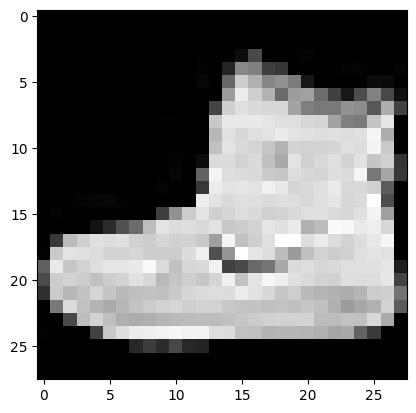

In [49]:
plt.imshow(image.squeeze(),cmap="gray")

In [50]:
rand_image_tensor=torch.randn(size=(1,28,28)).to(device)
rand_image_tensor

tensor([[[-7.9311e-02,  1.6144e+00, -4.6171e-01, -5.7414e-01,  5.1842e-01,
          -4.8354e-01,  1.3702e+00,  1.8823e-01, -6.3737e-01,  8.7616e-02,
           1.1489e+00,  8.7162e-01,  2.0577e-01, -1.0062e+00,  1.1125e+00,
          -7.4517e-01, -2.3947e-01,  7.5288e-01, -6.6769e-01,  5.5451e-01,
           9.0538e-01,  1.7207e+00,  3.2258e-01,  5.4998e-01,  1.3368e+00,
           9.1989e-01,  2.9305e-01,  7.0214e-01],
         [-1.0596e+00, -2.2214e+00,  7.0677e-01, -2.1389e-01, -1.0270e+00,
          -5.2316e-01,  1.4774e+00,  3.0483e-01, -6.4894e-01,  4.9036e-01,
          -2.8043e-01,  9.4100e-01, -8.9237e-01, -3.5752e-01,  1.0479e-01,
           4.1266e-02,  3.3505e-01, -2.4310e-01, -6.5055e-01, -3.3003e-01,
          -3.1443e-01, -1.3658e+00,  3.5626e-02, -4.3072e-01, -9.8891e-01,
          -1.0607e+00,  7.0623e-01, -2.2878e-01],
         [ 7.1535e-01,  4.1778e-01,  3.6404e-01, -1.6342e+00,  5.9972e-01,
          -3.3900e-01,  1.5490e-01, -2.7944e-01, -5.9674e-01,  2.4182e-02,


In [51]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [52]:
torch.manual_seed(42)

# Create a batch of images
images=torch.randn(size=(32,3,64,64))
test_image=images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [53]:
test_image.shape

torch.Size([3, 64, 64])

In [54]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=0)

# Pass the data through the convolutional layer
conv_output=conv_layer(test_image)
conv_output

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [55]:
test_image.shape

torch.Size([3, 64, 64])

In [56]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [57]:
torch.__version__

'2.4.0.dev20240610'

In [58]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=0)

# pass the data through the convolutional layer
conv_output=conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191, -

### 7.2 Stepping through `nn.MaxPool2d()`

In [59]:
test_image.shape

torch.Size([3, 64, 64])

In [60]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension shape: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv=conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_and_max_pool(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension shape: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_and_max_pool(): torch.Size([1, 10, 31, 31])


In [61]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor=torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f" Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the maxpool layer
max_pool_tensor=max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
 Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [62]:
image.shape

torch.Size([1, 28, 28])

### 7.3 setup a loss fn and optimizer for `model_2`

In [63]:
# Setup loss fn/eval metrics/optimizer
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

In [64]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and Testing `model_2` using our training and test functions

In [65]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2=timer()

# Training and Testing
epochs=3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_model_2,
                                          device=device)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.
Train loss: 0.60520 | Train acc: 78.12%


 33%|████████████████████████████                                                        | 1/3 [00:13<00:27, 13.56s/it]

Test loss: 0.40208 | Test acc: 85.83%

Epoch: 1
------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.
Train loss: 0.36007 | Train acc: 87.18%


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:26<00:13, 13.44s/it]

Test loss: 0.34791 | Test acc: 87.67%

Epoch: 2
------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.
Train loss: 0.32228 | Train acc: 88.41%


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:40<00:00, 13.44s/it]

Test loss: 0.32482 | Test acc: 88.29%

Train time on cuda: 40.307 seconds


In [66]:
# Get model_2 results
model_2_results=eval_model(model=model_2,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)

model_2_results

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 226.45it/s]


{'model_name': 'FashionMnistModelV2',
 'model_loss': 0.324821799993515,
 'model_acc': 88.28873801916933}

## 8. Compare model results and training time

In [67]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMnistModelV0,0.476639,83.426518
1,FashionMnistModelV1,0.685001,75.019968
2,FashionMnistModelV2,0.324822,88.288738


In [69]:
# Add training time to results comparison
compare_results["training_time"]=[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMnistModelV0,0.476639,83.426518,32.485146
1,FashionMnistModelV1,0.685001,75.019968,34.690038
2,FashionMnistModelV2,0.324822,88.288738,40.307378


Text(0, 0.5, 'model')

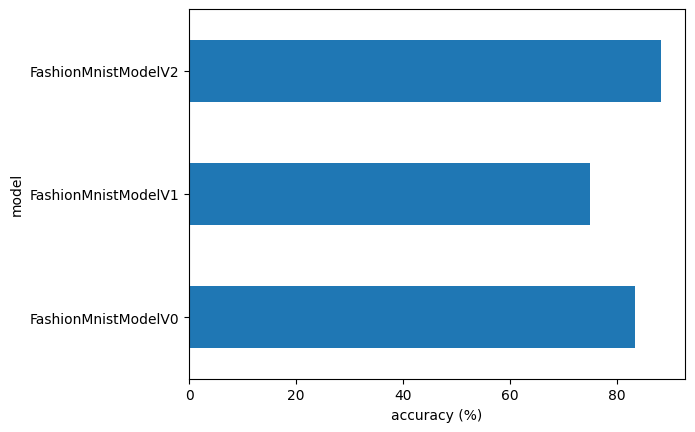

In [72]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [76]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
    pred_probs=[]
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample=torch.unsqueeze(sample,dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit=model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)

            # Get pred prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred probs to turn list into a tensor
    return torch.stack(pred_probs)

In [77]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [78]:
img,label=test_data[0][:10]
img.shape,label

(torch.Size([1, 28, 28]), 9)

In [81]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

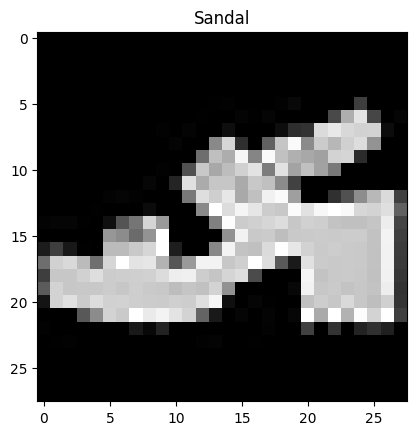

In [86]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [88]:
# Make predictions
pred_probs=make_predictions(model=model_2,
                            data=test_samples)

# View first two prediction probabilites
pred_probs[0]

tensor([2.5978e-07, 5.7328e-08, 6.1313e-08, 7.5761e-08, 4.1252e-08, 9.9970e-01,
        1.1392e-06, 1.2059e-05, 3.7574e-05, 2.4860e-04])

In [93]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [94]:
# Convert prediction probabilities to labels
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 9, 4, 3, 0, 4, 7, 1])

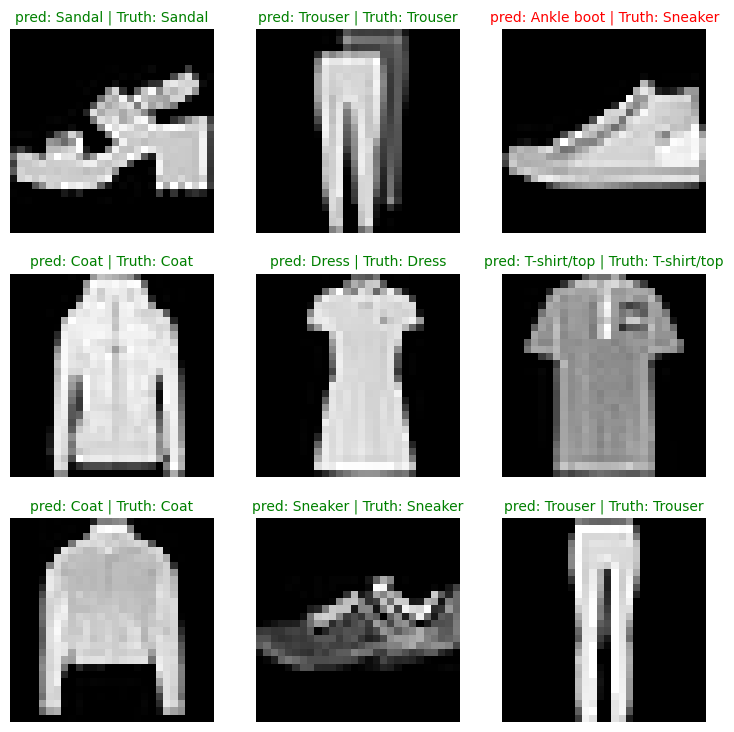

In [96]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows,ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(),cmap="gray")

    # Find the prediction (in text form, e.g "Sandal")
    pred_label=class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label= class_names[test_labels[i]]

    # Create a title for the plot
    title_text=f"pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label==truth_label:
        plt.title(title_text,fontsize=10,c="g") # green text if prediction same as truth
    else:
        plt.title(title_text,fontsize=10,c="r")

    plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually.

1. Make predictions with our training model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mixtend.plotting.plot_confusion_matrix()`

In [99]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc="Making predictions..."):
        # Send the data and targets to target device
        X,y=X.to(device),y.to(device)
        # Do the forward pass
        y_logit=model_2(X)
        # Turn prediction from logits -> prediction probabilites -> prediction labels
        y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
        # Put prediction on cpu for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor

Making predictions...: 100%|████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 239.82it/s]


tensor([9, 2, 1,  ..., 8, 1, 2])

In [100]:
len(y_pred_tensor)

10000

In [105]:
# See if required packages are installed and if not, install them...
try:
    import torchmetrics,mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >=19,"mlxtend version should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics,mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


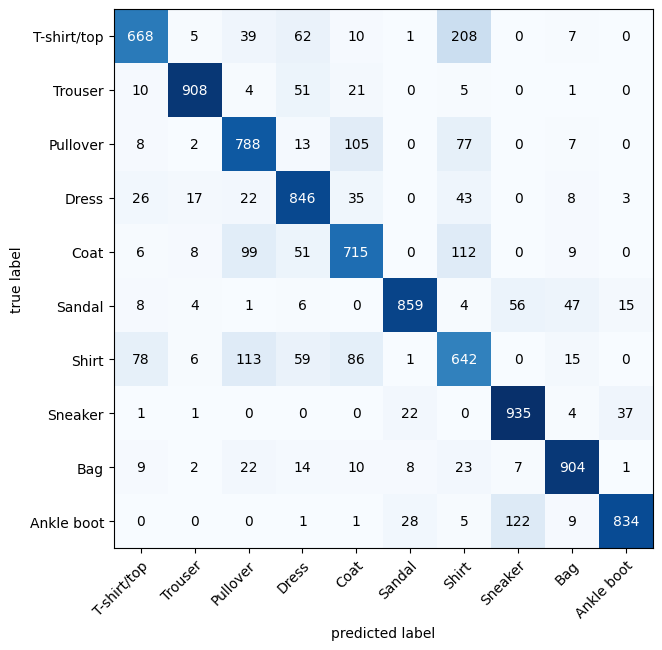

In [108]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matricx instance and compare predictions to targets
confmat=ConfusionMatrix(num_classes=len(class_names),
                       task="multiclass")
confmat_tensor=confmat(preds=y_pred_tensor,
                       target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), #matplotlib likes working with numpy
                                class_names=class_names,
                                figsize=(10,7))

## 11. Save and load best performing model

In [126]:
from pathlib import Path

# Create model dictory path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME="03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_2.pth


In [127]:
# Create new instance
torch.manual_seed(42)

loaded_model_2=FashionMnistModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMnistModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [128]:
model_2_results

{'model_name': 'FashionMnistModelV2',
 'model_loss': 0.324821799993515,
 'model_acc': 88.28873801916933}

In [131]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results=eval_model(model=loaded_model_2,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn,
                                  device=device)

loaded_model_2_results

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 236.45it/s]


{'model_name': 'FashionMnistModelV2',
 'model_loss': 0.324821799993515,
 'model_acc': 88.28873801916933}

In [134]:
# check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)           

tensor(True)